In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.objects import GenerationClass
from utils.config import color_maps, ycb_heights
import os
from glob import glob
from scipy import sparse
from PIL import Image
import json
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.utils.sapien_utils import look_at
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from pathlib import Path
import gymnasium as gym
from sapien.core import Pose
import numpy as np
from transforms3d.euler import euler2quat, quat2euler
from utils.config import ycb_heights, color_maps
from glob import glob
from scipy import sparse
from PIL import Image
import json
import os

from IPython.display import clear_output
# save_dir = "../final_data/"
# move_one_dir = os.path.join(save_dir, "move")
# move_cube_dir = os.path.join(move_one_dir, "cube")
# move_ycb_dir = os.path.join(move_one_dir, "ycb")
# os.makedirs(move_one_dir, exist_ok=True)
# os.makedirs(move_cube_dir, exist_ok=True)
# os.makedirs(move_ycb_dir, exist_ok=True)

In [2]:
# model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
model_paths = sorted(glob("../models/*/mesh.obj"))

gen = GenerationClass(model_paths)

In [3]:
# n = 20
# gen.generate(1, "place_object_in_direction", n)
# gen.generate(3, "place_object_in_direction", n, object="object")
# gen.generate(3, "place_object_in_direction", n)
# gen.generate(4, "place_object_in_direction", n)

# gen.generate(2, "place_object_on_another", n)
# gen.generate(3, "place_object_on_another", n)
# gen.generate(4, "place_object_on_another", n)

# gen.generate(3, "place_object_in_between", n)

# gen.generate(3, "remove_object", n)

# gen.generate(3, "order_by_color", n)

# gen.generate(2, "move_object", n)

# gen.generate(3, "move_object_toward_another", n)

In [23]:
from utils.run_tsr import process_images
from utils.conver_color import convert

/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [27]:
names = sorted([i[:-4] for i in os.listdir('../data/object_images')])
names = [i for i in names if i not in os.listdir("../models")]
# for path in glob("../models/*"):
#     # rename to lower case
#     os.rename(path, path.lower())

In [29]:
idx = 0

In [45]:
idx += 1

In [46]:
name = names[idx]
name

'chair'

In [70]:
process_images([f"../data/object_images/{name}.png"], 
               output_dir=f"../models/{name}", foreground_ratio=0.5)
convert(f"../models/{name}/0/mesh.obj", f"../models/{name}")

2024-04-03 16:48:57,947 - INFO - Initializing model ...
2024-04-03 16:48:57,951 - INFO - Initializing model finished in 4.20ms.
2024-04-03 16:48:57,951 - INFO - Processing images ...
2024-04-03 16:48:58,958 - INFO - Processing images finished in 1006.24ms.
2024-04-03 16:48:58,958 - INFO - Running image 1/1 ...
2024-04-03 16:48:58,959 - INFO - Running model ...
2024-04-03 16:48:59,241 - INFO - Running model finished in 282.22ms.
2024-04-03 16:48:59,241 - INFO - Exporting mesh ...


torchmcubes was not compiled with CUDA support, use CPU version instead.


2024-04-03 16:49:01,719 - INFO - Exporting mesh finished in 2477.83ms.


OBJ import of 'mesh.obj' took 12.5 ms
Fra:1 Mem:215.24M (Peak 415.34M) | Time:475607:49:01.95 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | mesh
Fra:1 Mem:218.90M (Peak 415.34M) | Time:475607:49:01.95 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:218.90M (Peak 415.34M) | Time:475607:49:01.95 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading mesh_BakedTexture.013
Info: Baking map saved to internal image, save it externally or pack it
OBJ export of 'mesh.obj' took 50.4 ms


Writing to ../models/chair/mesh.obj


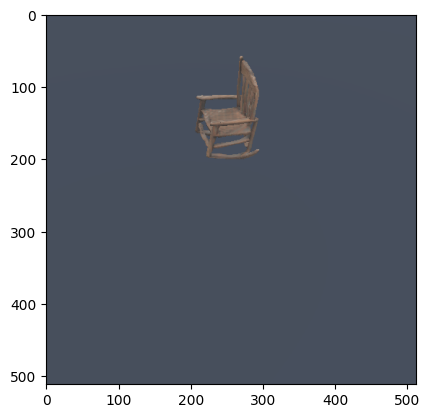

In [71]:
obj_cfgs, camera_cfgs = gen.model_configs(1, [name])
env = gen.get_env(obj_cfgs, camera_cfgs)
gen.initialize_positions(1, obj_cfgs)
gen.brightness = 40

for i in range(1):
    env.obj.set_pose(Pose([0, 0, 0.5], env.obj.get_pose().q))
    obs, _, _, _, _ = env.step(env.action_space.sample())
    clear_output(wait=True)
    plt.imshow(gen.get_image(obs, "object"))
    plt.show()


In [5]:
len(models)

29

[2024-04-03 13:35:19.452] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-04-03 13:35:19.452] [svulkan2] [warning] Continue without GLFW.
[2024-04-03 13:35:25.090] [SAPIEN] [error] File not found: ../models/imgs/mesh.obj
[2024-04-03 13:35:25.090] [SAPIEN] [error] Failed to load visual mesh: ../models/imgs/mesh.obj
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.obj to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.obj` for environment variables or `env.get_wrapper_attr('obj')` that will search the reminding wrappers.
  logger.warn(
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.objs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.objs` for environment variables or `env.get_w

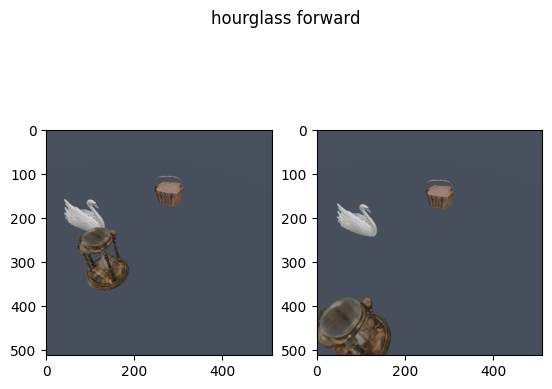

In [9]:
n = 4
fig, axs = plt.subplots(1, 2)
for model in models:
    # chosing models
    other_models = [m for m in models if m != model]
    other_model = np.random.choice(other_models, n-1, replace=False)
    other_model = [model] + list(other_model)
    obj_cfgs, camera_cfgs = gen.model_configs(n, other_model)
    env = gen.get_env(obj_cfgs, camera_cfgs)

    gen.initialize_positions(n, obj_cfgs)

    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
    img = obs['image']["base_camera"]["rgb"]
    img = gen.get_image(obs, "object")

    axs[0].imshow(img)

    direction = "forward"
    rand_obj = np.random.choice(gen.env.objs)
    gen.place_object_in_direction(rand_obj, direction)

    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
    img = gen.get_image(obs, "object")
    axs[1].imshow(img)
    plt.suptitle(f"{rand_obj.name} {direction}")
    plt.show()
    break

In [10]:
other_model

['basket', 'hourglass', 'imgs', 'swan']